# K-Mode Clustering in Python

**- K-mode clustering is an unsupervised machine-learning used to group categorical data into k clusters (groups). The K-Modes clustering partitions the data into two mutually exclusive groups. Unlike K-Means which uses distances between numbers K-Modes uses the number of mismatches between categorical values to decide how similar two data points are. For example:**

- Data point 1: ["red", "small", "round"]
- Data point 2: ["blue", "small", "square"]

**How K-Modes clustering works?**
- Unlike hierarchical clustering KModes requires us to decide the number of clusters (K) in advance. Here's how it works step by step:

**- Start by picking clusters:** Randomly select K data points from the dataset to act as the starting clusters these are called "modes".

**- Assign data to clusters:** Check how similar each data point is to these clusters using the total number of mismatches and assign each data point to the cluster it matches the most.

**- Update the clusters:** Find the most common value for each cluster and update the cluster centers based on this.

**- Repeat the process:** Keep repeating steps 2 and 3 until no data points are reassigned to different clusters.

## Implementation of the k-mode clustering algorithm

### Step 1: Prepare Your Data

In [1]:
import numpy as np
import pandas as pd

data = np.array([
    ['A', 'B', 'C'],
    ['B', 'C', 'A'],
    ['C', 'A', 'B'],
    ['A', 'C', 'B'],
    ['A', 'A', 'B']
])

### Step 2: Set Number of Clusters

Decide how many groups you want to divide your data into.

In [4]:
k = 2

### Step 3: Pick Starting Points (Modes)

In [5]:
np.random.seed(0)
modes = data[np.random.choice(data.shape[0], k, replace=False)]

### Step 4: Assign Data to Clusters

In [6]:
clusters = np.zeros(data.shape[0], dtype=int)

for _ in range(10):  
    for i, point in enumerate(data):
        distances = [np.sum(point != mode) for mode in modes]
        clusters[i] = np.argmin(distances)

### Step 5: Update Cluster Modes

In [7]:
for j in range(k):
        if np.any(clusters == j):
            modes[j] = pd.DataFrame(data[clusters == j]).mode().iloc[0].values

### Step 6: View Final Results

In [8]:
print("Cluster assignments:", clusters)
print("Cluster modes:", modes)

Cluster assignments: [1 0 0 0 0]
Cluster modes: [['A' 'A' 'B']
 ['A' 'B' 'C']]


## Cluster with kmodes Library

### Optimal number of clusters in the K-Mode algorithm

In [10]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 7.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 4.0
Run 1, iteration: 2/100, moves: 0, cost: 4.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1, cost: 4.0
Run 2, iteration: 2/100, moves: 0, cost: 4.0
Init: initial

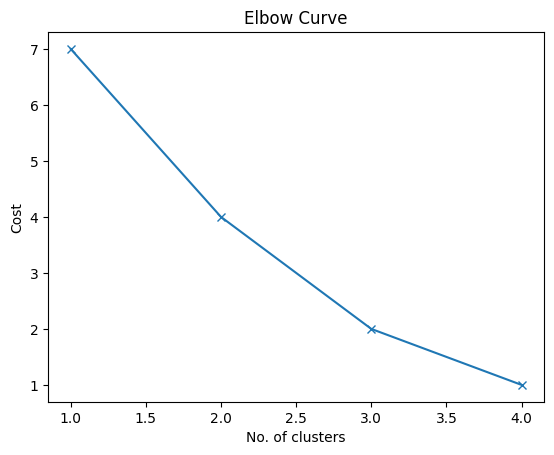

In [11]:
import pandas as pd
import numpy as np
# !pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

cost = []
K = range(1,5)
for k in list(K):
    kmode = KModes(n_clusters=k, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'x-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')
plt.show()

In [12]:
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1, cost: 4.0
Run 2, iteration: 2/100, moves: 0, cost: 4.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2, cost: 5.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 5.0
Best run was number 2


array([0, 1, 0, 0, 0], dtype=uint16)

# The End ! 